# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [38]:
import sys
sys.path.append('../src')

In [39]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource, Scope
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min

## Data Import

In [40]:
horizon = 1

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [41]:
scales = TemporalScale(discretization_list=[1, 24])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [42]:
bigM = 10**4
smallM = 0.001

Hourly electricity prices

In [43]:
#Electricity price is hourly
#Electricity price is hourly
elec_price_df = pd.read_csv('ERCOT_price.csv')
elec_price_df = elec_price_df[elec_price_df['BusName'] == 'FORMOSA_G8']
elec_price_df = elec_price_df[['LMP']].reset_index(drop = True)

In [44]:
#elec_price_df

Hourly Natural Gas Prices

In [45]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
NG_price_df = pd.read_csv('Naturalgas_price_hourly.csv')
NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
NG_price_df = NG_price_df[['USD/kg']]
#NG_price_df

In [46]:
#Gives relevancy to price values again
elec_price = elec_price_df.max()[0]
NG_price = NG_price_df.max()[0]

C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_9676\1055063789.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elec_price = elec_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_9676\1055063789.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NG_price = NG_price_df.max()[0]


Hourly Wind availability

In [47]:
Wind_df = pd.read_csv('Wind2424.csv')
Wind_df = Wind_df[['ACTUAL_SYSTEM_WIDE']]
Wind_df = Wind_df[:24]
#Wind_df

Hourly Solar availability

In [48]:
Solar_df = pd.read_csv('Solar2424.csv')
Solar_df = Solar_df[['PVGRPP_SYSTEM_WIDE']]
Solar_df = Solar_df[:24]
#Solar_df

In [49]:
Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', price= 50, gwp=0)

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power', price= 100, gwp=0)

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

GridPower = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', price = 20, gwp=100, scope = Scope.ONE)

#The following are components of natural gas

CO2 = Resource(name='CO2', basis='kg/hr',
               label='Carbon dioxide', block='Resource')

CO2_Stack = Resource(name='CO2 to Stack', basis='kg/hr', sell=True,
               label='Carbon dioxide to Stack', block='Resource', gwp = 1, scope = Scope.ONE)

#Important: Natural gas consists over different components

NG = Resource(name='Natural Gas', basis='kg/hr',
                     cons_max=bigM, label='Natural Gas', price = 10, gwp = 20, scope = Scope.ONE)


# Hydrogen is what I want to sell/satisfy a specific demand for

H2 = Resource(name='Hydrogen', basis='kg/hr', label='Hydrogen', block='Resource')

H2Pure = Resource(name='Pure Hydrogen', demand = True, basis='kg/hr', label='Pure Hydrogen', block='Resource')

# Water is required for the electrolysis process

H2O = Resource(name='H2O',
               basis='kg/hr', cons_max=bigM, label='Water', price=0.002,  block='Resource', gwp = 200, scope=Scope.TWO)

#Industrial water price is 0.002 USD/kg of water

# Air components


## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [50]:
'''Do I understand it correctly that I will have no material modes'''

'Do I understand it correctly that I will have no material modes'

## Declare Processes

In [51]:
'''Purchasing electricity from a traditional power production system'''

Grid = Process(name='Grid', conversion={GridPower: -1, Power: 1},prod_min=smallM, prod_max=100, label='Grid', basis='MW')

PV = Process(name='PV', conversion={Solar: -1, Power: 1},
             prod_max=100, prod_min=0, label='Solar PV', basis='MW')

WF = Process(name='WF', conversion={Wind: -1, Power: 1},
             prod_max=100, prod_min=0, label='Wind mill array', basis='MW')


SMR = Process(name='SMR', conversion={Power: -1, NG: -1, 
                                            H2Pure: 1, CO2_Stack: 5}, capex=0.0001,
               vopex=1.2, fopex=0.001, prod_min=smallM, prod_max=200, label='SMR', basis='kg/hr')


SMRCCS = Process(name='SMRCCS', conversion={Power: -1, NG: -1, CO2_Stack: 0.4685, H2Pure: 1}, capex=0.0001,
                vopex=2, fopex=0.001, prod_min=smallM, prod_max=bigM, label='SMRCCS', basis='kg/hr')

PEM = Process(name='PEM', conversion={Power: -3, H2O: -5, H2Pure: 1}, capex=0.0001,
               vopex=4.668, fopex=0.001, prod_min=smallM, prod_max=bigM, label='PEM', basis='kg/hr')


## Declare Location

In [52]:
process_set = {Grid, PV, WF, SMR, SMRCCS, PEM}#, SMRCCS, PEM} #Grid,

In [53]:
houston = Location(name='HO', processes=process_set, scales=scales, label='Houston', expenditure_scale_level=0, demand_scale_level=0, price_scale_level=1, capacity_scale_level=1)


## Declare Scenario

In [54]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, demand_scale_level=0, 
                    purchase_scale_level = 1, scheduling_scale_level=1, network_scale_level=0, capacity_scale_level=1,
                    label='full_case', demand={houston: { H2Pure: 500}})

In [55]:
scenario.set_dict['resources_purch_scope2']

['H2O']

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [56]:
#, Constraints.MODE

milp_scope1 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.SCOPEONE}, objective=Objective.MIN_ScopeONE_GWP, demand_sign = 'eq')

#, Constraints.SCOPEONE

#, Constraints.EMISSION

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process scope1
constraint global warming potential resource scope1
constraint global warming potential resource consumption scope1
constraint global warming potential resource discharge scope1
constraint global warming potential location scope1
constraint global warming potential network scope1
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
constraint network cost
objective gwp scope1 min


In [57]:
# # model.component

# from pyomo.environ import ConstraintList
# milp_scope1.cons1 = ConstraintList()
# for i in scales.scale_iter(2):
#     milp_scope1.cons1.add(expr = milp_scope1.P['HO', 'SMR', *i] >= 5)

In [58]:
# # model.component

# from pyomo.environ import ConstraintList

# ramping_limit = 3

# milp_cost.cons2 = ConstraintList()
# for i in scales.scale_iter(1):
#     if i != (0,0):
#         milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)


## Optimize to minimize cost

In [59]:
results_scope1 = solve(scenario=scenario, instance=milp_scope1,
                     solver='gurobi', name=f"res_scope1", print_solversteps=True, saveformat = '.pkl')


Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 829 rows, 935 columns and 2178 nonzeros
Model fingerprint: 0xd8271120
Variable types: 929 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+04]
Presolve removed 826 rows and 927 columns
Presolve time: 0.00s
Presolved: 3 rows, 8 columns, 12 nonzeros
Variable types: 8 continuous, 0 integer (0 binary)

Root relaxation: objective 0.000000e+00, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0            

In [60]:
results_scope1.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 500.0,
 ('PV', 0): 0.0,
 ('SMR', 0): 0.0,
 ('SMRCCS', 0): 0.0,
 ('WF', 0): 1500.0}

In [61]:
results_scope1.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 31.25,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 31.25,
 ('HO', 'PEM', 0, 4): 31.25,
 ('HO', 'PEM', 0, 5): 31.25,
 ('HO', 'PEM', 0, 6): 31.25,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 31.25,
 ('HO', 'PEM', 0, 9): 31.25,
 ('HO', 'PEM', 0, 10): 0.0,
 (

In [62]:
#, Constraints.MODE

milp_scope2 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.SCOPETWO}, objective=Objective.MIN_ScopeTWO_GWP, demand_sign = 'eq')

#, Constraints.SCOPEONE

#, Constraints.EMISSION

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process scope2
constraint global warming potential resource scope2
constraint global warming potential resource consumption scope2
constraint global warming potential resource discharge scope2
constraint global warming potential location scope2
constraint global warming potential network scope2
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
constraint network cost
objective gwp scope2 min


In [63]:
results_scope2 = solve(scenario=scenario, instance=milp_scope2,
                     solver='gurobi', name=f"res_scope2", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 827 rows, 935 columns and 2172 nonzeros
Model fingerprint: 0xb06d8b8e
Variable types: 929 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+04]
Presolve removed 827 rows and 935 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 24 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


In [64]:
results_scope2.output['P_network']

{('Grid', 0): 304.3478260869565,
 ('PEM', 0): 0.0,
 ('PV', 0): 21.73913043478261,
 ('SMR', 0): 0.0,
 ('SMRCCS', 0): 500.0,
 ('WF', 0): 173.91304347826087}

In [31]:
results_scope2.output['objective']

0.0

In [35]:
results_scope2.output['global_warming_potential_location_scope1']

{('HO', 0): None}

In [27]:
#, Constraints.MODE

milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

#, Constraints.SCOPEONE

#, Constraints.EMISSION

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [28]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 948 rows, 935 columns and 2442 nonzeros
Model fingerprint: 0xb1793d3f
Variable types: 929 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+04]
Presolve removed 945 rows and 927 columns
Presolve time: 0.00s
Presolved: 3 rows, 8 columns, 12 nonzeros
Variable types: 8 continuous, 0 integer (0 binary)

Root relaxation: objective 1.023425e+04, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0            

In [29]:
results_gwp.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.0,
 ('SMR', 0): 0.0,
 ('SMRCCS', 0): 500.0,
 ('WF', 0): 500.0}

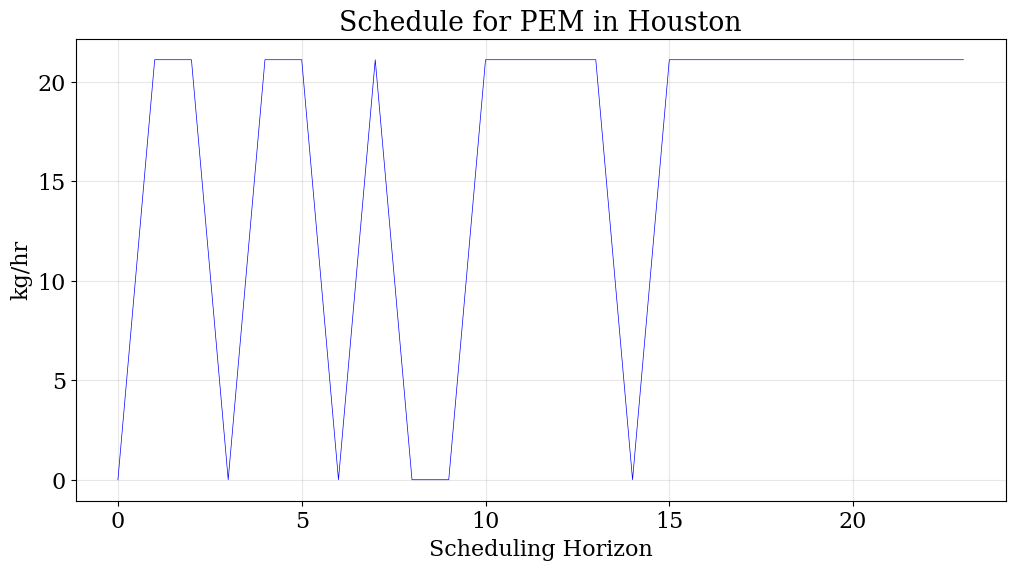

In [226]:
plot_results.schedule(results = results_scope1, y_axis= 'P', component = 'PEM', location='HO')

In [277]:
results_scope1.output['global_warming_potential_resource_scope1']

{('HO', 'CO2 to Stack', 0): 0.0,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'Natural Gas', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [79]:
results_scope1.output['P']

{('HO', 'Grid', 0, 0): 5.0,
 ('HO', 'Grid', 0, 1): 5.0,
 ('HO', 'Grid', 0, 2): 5.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 5.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 5.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 100.0,
 ('HO', 'Grid', 0, 13): 5.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 5.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 5.0,
 ('HO', 'Grid', 0, 18): 5.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 5.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM',

In [ ]:

data = results_cost.output['P']

In [ ]:
df = pd.DataFrame(data,index=[0])

In [ ]:
df

In [ ]:
df=df.T

In [ ]:
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mincostprod.xlsx', index=True)

In [ ]:
# data = results_cost.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mincostresource_emission.xlsx', index=True)

In [80]:
milp_scope1.constraint_inventory_balance.pprint()

constraint_inventory_balance : mass balance across scheduling scale
    Size=192, Index=locations*resources*{0}*{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}, Active=True
    Key                            : Lower : Body                                                                                                                                                                     : Upper : Active
      ('HO', 'CO2 to Stack', 0, 0) :   0.0 :        0*P_m[HO,Grid,0,0,0] + 0*P_m[HO,PEM,0,0,0] + 0*P_m[HO,PV,0,0,0] + 5*P_m[HO,SMR,0,0,0] + 0.4685*P_m[HO,SMRCCS,0,0,0] + 0*P_m[HO,WF,0,0,0] - S[HO,CO2 to Stack,0,0] :   0.0 :   True
      ('HO', 'CO2 to Stack', 0, 1) :   0.0 :        0*P_m[HO,Grid,0,0,1] + 0*P_m[HO,PEM,0,0,1] + 0*P_m[HO,PV,0,0,1] + 5*P_m[HO,SMR,0,0,1] + 0.4685*P_m[HO,SMRCCS,0,0,1] + 0*P_m[HO,WF,0,0,1] - S[HO,CO2 to Stack,0,1] :   0.0 :   True
      ('HO', 'CO2 to Stack', 0, 2) :   0.0 :        0*P_m[HO,Grid,0,0,2] + 0*P_m[HO,PEM,0,0,2] 

In [227]:
results_scope1.output['objective']

3000.0

In [230]:
results_scope1.output['Cost']

{None: 127643.85999999999}

In [ ]:
# plot_results.cost(results=results_cost, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [229]:
results_scope1.output['global_warming_potential_location_scope1']

{('HO', 0): 3000.0}

In [ ]:
results_cost.output['P_network']

In [232]:
results_scope1.output['global_warming_potential_resource_scope1']

{('HO', 'CO2 to Stack', 0): 600.0,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'Natural Gas', 0): 2400.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [234]:
results_scope1.output['global_warming_potential_process']

{('HO', 'Grid', 0): None,
 ('HO', 'PEM', 0): None,
 ('HO', 'PV', 0): None,
 ('HO', 'SMR', 0): None,
 ('HO', 'SMRCCS', 0): None,
 ('HO', 'WF', 0): None}

In [ ]:
results_cost.output['X_P']

In [235]:
milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons1.add(expr = milp_gwp.P['HO', 'PEM', *i] - milp_gwp.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)


In [ ]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons2.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

In [ ]:
# model.component

from pyomo.environ import ConstraintList
milp_gwp.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMRCCS', *i] >= 5)

In [ ]:
milp_gwp.constraint_resource_purchase_varying.pprint()

In [236]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 948 rows, 934 columns and 2441 nonzeros
Model fingerprint: 0xb22c6a8b
Variable types: 928 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+04]
Presolve removed 945 rows and 926 columns
Presolve time: 0.00s
Presolved: 3 rows, 8 columns, 12 nonzeros
Variable types: 8 continuous, 0 integer (0 binary)

Root relaxation: objective 0.000000e+00, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0            

In [ ]:
plot_results.schedule(results = results_gwp, y_axis= 'P', component = 'PEM', location='HO')

In [237]:
results_gwp.output['Cost']

{None: 152361.22}

In [238]:
results_gwp.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 31.25,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 31.25,
 ('HO', 'PEM', 0, 4): 31.25,
 ('HO', 'PEM', 0, 5): 31.25,
 ('HO', 'PEM', 0, 6): 31.25,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 31.25,
 ('HO', 'PEM', 0, 9): 31.25,
 ('HO', 'PEM', 0, 10): 0.0,
 (

In [ ]:
# data = results_gwp.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod.xlsx', index=True)

In [ ]:
results_cost.output['Cap_P']

In [ ]:
results_gwp.output['Cap_P']

In [ ]:
milp_gwp.constraint_global_warming_potential_resource.pprint()

In [ ]:
scenario.resource_gwp_dict

In [ ]:
results_gwp.output['X_P']

In [ ]:
results_cost.output['X_P']

In [ ]:
results_gwp.output['Cap_P']

In [ ]:
results_cost.output['Cap_P']

In [ ]:
results_gwp.output['Capex_network']

In [ ]:
results_gwp.output['Fopex_network']

In [ ]:
results_gwp.output['Vopex_network']

In [ ]:
results_gwp.output['B_network']

In [ ]:
results_cost.output['B_network']

In [ ]:
results_cost.output['C_network']

In [ ]:
results_cost.output['P']['HO','SMR',0,0]

In [ ]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

In [ ]:
[results_cost.output['P'][('HO', 'SMR', *i)] for i in scales.scale_iter(2)]

In [ ]:
results_cost.output['C']

In [ ]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

In [ ]:
results_cost.output['C']

In [ ]:
results_cost.output['P_network']

In [ ]:
results_gwp.output['P_network']

In [ ]:
PEM.conversion[Power]/SMR.conversion[Power]

In [ ]:
SMR.conversion[Power]

In [ ]:
SMRCCS.conversion[Power]

In [ ]:
results_cost.output['Cap_P']

In [ ]:
results_cost.output['S_network']

In [ ]:
results_gwp.output['S_network']

In [ ]:
results_gwp.output['Cost']

In [ ]:
results_gwp.output['X_P']

In [ ]:
results_gwp.output['Cap_P']

In [ ]:
results_cost.output['objective']

In [ ]:
results_gwp.output['objective']

In [ ]:
results_cost.output['global_warming_potential_network']

In [ ]:
results_gwp.output['global_warming_potential_network']

In [ ]:
results_gwp.output['global_warming_potential_resource']

In [ ]:
results_gwp.output['P_network']

In [ ]:
results_cost.output['P_network']

In [ ]:
results_gwp.output

In [ ]:

# plot_results.gwp(results=results_gwp, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [ ]:
results_gwp.output['global_warming_potential_location']

In [ ]:
results_gwp.output['P_network']

EMISSION RESTRICTIONS

In [ ]:
milp_gwp_10 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_10, network_scale_level = 0, gwp_reduction_pct = 10, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_10.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons1.add(expr = milp_gwp_10.P['HO', 'PEM', *i] - milp_gwp_10.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons2.add(expr = milp_gwp_10.P['HO', 'SMR', *i] - milp_gwp_10.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons3.add(expr = milp_gwp_10.P['HO', 'SMRCCS', *i] - milp_gwp_10.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_10.cons4.add(expr = milp_gwp_10.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_10 = solve(scenario=scenario, instance=milp_gwp_10,
                     solver='gurobi', name=f"res_gwp_10", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_10.output['objective']

In [ ]:
results_gwp_10.output['global_warming_potential_location']

In [ ]:
results_gwp_10.output['P']

In [ ]:
# data = results_gwp_10.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod10.xlsx', index=True)

In [ ]:
# data = results_gwp_10.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp10resource_emission.xlsx', index=True)

In [ ]:
results_cost.output['global_warming_potential_resource']

In [ ]:
results_gwp_10.output['global_warming_potential_resource']

In [ ]:
milp_gwp_20 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_20, network_scale_level = 0, gwp_reduction_pct = 20, gwp = results_cost.output['global_warming_potential_network'][0])


In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_20.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons1.add(expr = milp_gwp_20.P['HO', 'PEM', *i] - milp_gwp_20.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons2.add(expr = milp_gwp_20.P['HO', 'SMR', *i] - milp_gwp_20.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons3.add(expr = milp_gwp_20.P['HO', 'SMRCCS', *i] - milp_gwp_20.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_20.cons4.add(expr = milp_gwp_20.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_20 = solve(scenario=scenario, instance=milp_gwp_20,
                     solver='gurobi', name=f"res_gwp_20", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_20.output['objective']


In [ ]:
results_gwp_20.output['P']

In [ ]:
results_gwp_20.output['global_warming_potential_location']

In [ ]:
results_gwp_20.output['global_warming_potential_resource']

In [ ]:
results_gwp_20.output['P_network']

In [ ]:
# data = results_gwp_20.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod20.xlsx', index=True)

In [ ]:
# data = results_gwp_20.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp20resource_emission.xlsx', index=True)

In [ ]:
results_gwp_20.output["objective"]

In [ ]:
milp_gwp_30 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_30, network_scale_level = 0, gwp_reduction_pct = 30, gwp = results_cost.output['global_warming_potential_network'][0])





In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_30.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons1.add(expr = milp_gwp_30.P['HO', 'PEM', *i] - milp_gwp_30.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons2.add(expr = milp_gwp_30.P['HO', 'SMR', *i] - milp_gwp_30.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons3.add(expr = milp_gwp_30.P['HO', 'SMRCCS', *i] - milp_gwp_30.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_30.cons4.add(expr = milp_gwp_30.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_30 = solve(scenario=scenario, instance=milp_gwp_30,
                     solver='gurobi', name=f"res_gwp_30", print_solversteps=True, saveformat = '.pkl')

In [ ]:

results_gwp_30.output['objective']

In [ ]:
results_gwp_30.output['P']

In [ ]:
results_gwp_30.output['global_warming_potential_location']

In [ ]:
results_gwp_30.output['P_network']

In [ ]:
plot_results.cost(results=results_gwp_30, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
# data = results_gwp_30.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod30.xlsx', index=True)

In [ ]:
results_gwp_30.output["objective"]

In [ ]:
# data = results_gwp_30.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp30resource_emission.xlsx', index=True)

In [ ]:
milp_gwp_40 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_40, network_scale_level = 0, gwp_reduction_pct = 40, gwp = results_cost.output['global_warming_potential_network'][0])


In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_40.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons1.add(expr = milp_gwp_40.P['HO', 'PEM', *i] - milp_gwp_40.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons2.add(expr = milp_gwp_40.P['HO', 'SMR', *i] - milp_gwp_40.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons3.add(expr = milp_gwp_40.P['HO', 'SMRCCS', *i] - milp_gwp_40.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_40.cons4.add(expr = milp_gwp_40.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_40 = solve(scenario=scenario, instance=milp_gwp_40,
                     solver='gurobi', name=f"res_gwp_40", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_40.output['objective']

In [ ]:
results_gwp_40.output['global_warming_potential_location']

In [ ]:
results_gwp_40.output['global_warming_potential_resource']

In [ ]:
results_gwp_40.output['P_network']

In [ ]:
results_gwp_40.output['P']

In [ ]:
plot_results.cost(results=results_gwp_40, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMRCCS', location='HO')


In [ ]:
# data = results_gwp_40.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod40.xlsx', index=True)

In [ ]:
# data = results_gwp_40.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp40resource_emission.xlsx', index=True)

In [ ]:
results_gwp_40.output["objective"]

In [ ]:
milp_gwp_50 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_50, network_scale_level = 0, gwp_reduction_pct = 50, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_50.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons1.add(expr = milp_gwp_50.P['HO', 'PEM', *i] - milp_gwp_50.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons2.add(expr = milp_gwp_50.P['HO', 'SMR', *i] - milp_gwp_50.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons3.add(expr = milp_gwp_50.P['HO', 'SMRCCS', *i] - milp_gwp_50.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_50.cons4.add(expr = milp_gwp_50.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_50 = solve(scenario=scenario, instance=milp_gwp_50,
                     solver='gurobi', name=f"res_gwp_50", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_50.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod50.xlsx', index=True)

In [ ]:
# data = results_gwp_50.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp50resource_emission.xlsx', index=True)

In [ ]:
results_gwp_50.output["objective"]

In [ ]:
results_gwp_50.output['global_warming_potential_location']

In [ ]:
milp_gwp_60 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_60, network_scale_level = 0, gwp_reduction_pct = 60, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_60.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons1.add(expr = milp_gwp_60.P['HO', 'PEM', *i] - milp_gwp_60.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons2.add(expr = milp_gwp_60.P['HO', 'SMR', *i] - milp_gwp_60.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons3.add(expr = milp_gwp_60.P['HO', 'SMRCCS', *i] - milp_gwp_60.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_60.cons4.add(expr = milp_gwp_60.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_60 = solve(scenario=scenario, instance=milp_gwp_60,
                     solver='gurobi', name=f"res_gwp_60", print_solversteps=True, saveformat = '.pkl')

In [ ]:
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMRCCS', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
# data = results_gwp_60.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod60.xlsx', index=True)

In [ ]:
# data = results_gwp_60.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp60resource_emission.xlsx', index=True)

In [ ]:
results_gwp_60.output["objective"]

In [ ]:
results_gwp_60.output["P"]

In [ ]:
results_gwp_60.output['global_warming_potential_location']

In [ ]:
results_gwp_60.output['global_warming_potential_resource']

In [ ]:
milp_gwp_70 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_70, network_scale_level = 0, gwp_reduction_pct = 70, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_70.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons1.add(expr = milp_gwp_70.P['HO', 'PEM', *i] - milp_gwp_70.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons2.add(expr = milp_gwp_70.P['HO', 'SMR', *i] - milp_gwp_70.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons3.add(expr = milp_gwp_70.P['HO', 'SMRCCS', *i] - milp_gwp_70.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_70.cons4.add(expr = milp_gwp_70.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_70 = solve(scenario=scenario, instance=milp_gwp_70,
                     solver='gurobi', name=f"res_gwp_70", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_70.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod70.xlsx', index=True)

In [ ]:
# data = results_gwp_70.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp70resource_emission.xlsx', index=True)

In [ ]:
results_gwp_70.output["objective"]

In [ ]:
results_gwp_70.output['global_warming_potential_resource']

In [ ]:
results_gwp_70.output["P"]

In [ ]:
results_gwp_70.output['global_warming_potential_location']

In [ ]:
milp_gwp_75 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_75, network_scale_level = 0, gwp_reduction_pct = 75, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_75.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons1.add(expr = milp_gwp_75.P['HO', 'PEM', *i] - milp_gwp_75.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons2.add(expr = milp_gwp_75.P['HO', 'SMR', *i] - milp_gwp_75.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons3.add(expr = milp_gwp_75.P['HO', 'SMRCCS', *i] - milp_gwp_75.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_75.cons4.add(expr = milp_gwp_75.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_75 = solve(scenario=scenario, instance=milp_gwp_75,
                     solver='gurobi', name=f"res_gwp_75", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_75.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod75.xlsx', index=True)

In [ ]:
results_gwp_75.output["objective"]

In [ ]:
results_gwp_75.output["P"]

In [ ]:
results_gwp_75.output['global_warming_potential_location']

In [ ]:
milp_gwp_78 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_78, network_scale_level = 0, gwp_reduction_pct = 78, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_78.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons1.add(expr = milp_gwp_78.P['HO', 'PEM', *i] - milp_gwp_78.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons2.add(expr = milp_gwp_78.P['HO', 'SMR', *i] - milp_gwp_78.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons3.add(expr = milp_gwp_78.P['HO', 'SMRCCS', *i] - milp_gwp_78.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_78.cons4.add(expr = milp_gwp_78.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_78 = solve(scenario=scenario, instance=milp_gwp_78,
                     solver='gurobi', name=f"res_gwp_78", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_78.output['objective']

In [ ]:
results_gwp_78.output['global_warming_potential_location']

In [ ]:
results_gwp_78.output["P"]

In [ ]:
# data = results_gwp_78.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod78.xlsx', index=True)

In [ ]:
plot_results.cost(results=results_gwp_78, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
milp_gwp_79 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_79, network_scale_level = 0, gwp_reduction_pct = 79, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_79.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons1.add(expr = milp_gwp_79.P['HO', 'PEM', *i] - milp_gwp_79.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons2.add(expr = milp_gwp_79.P['HO', 'SMR', *i] - milp_gwp_79.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons3.add(expr = milp_gwp_79.P['HO', 'SMRCCS', *i] - milp_gwp_79.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_79.cons4.add(expr = milp_gwp_79.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_79 = solve(scenario=scenario, instance=milp_gwp_79,
                     solver='gurobi', name=f"res_gwp_79", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_79.output['objective']

In [ ]:
results_gwp_79.output['global_warming_potential_location']

In [ ]:
results_gwp_79.output['P']

In [ ]:
milp_gwp_85 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_85, network_scale_level = 0, gwp_reduction_pct = 85, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_85.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons1.add(expr = milp_gwp_85.P['HO', 'PEM', *i] - milp_gwp_85.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons2.add(expr = milp_gwp_85.P['HO', 'SMR', *i] - milp_gwp_85.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons3.add(expr = milp_gwp_85.P['HO', 'SMRCCS', *i] - milp_gwp_85.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_85.cons4.add(expr = milp_gwp_85.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_85 = solve(scenario=scenario, instance=milp_gwp_85,
                     solver='gurobi', name=f"res_gwp_85", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_85.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod85.xlsx', index=True)

In [ ]:
results_gwp_85.output['objective']

In [ ]:
results_gwp_85.output['global_warming_potential_location']

In [ ]:
results_gwp_85.output['P']

In [ ]:
milp_gwp_80 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_80, network_scale_level = 0, gwp_reduction_pct = 80, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_80.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons1.add(expr = milp_gwp_80.P['HO', 'PEM', *i] - milp_gwp_80.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons2.add(expr = milp_gwp_80.P['HO', 'SMR', *i] - milp_gwp_80.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons3.add(expr = milp_gwp_80.P['HO', 'SMRCCS', *i] - milp_gwp_80.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_80.cons4.add(expr = milp_gwp_80.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_80 = solve(scenario=scenario, instance=milp_gwp_80,
                     solver='gurobi', name=f"res_gwp_80", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_80.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod80.xlsx', index=True)

In [ ]:
# data = results_gwp_80.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp80resource_emission.xlsx', index=True)

In [ ]:
results_gwp_80.output['objective']

In [ ]:
results_gwp_80.output['global_warming_potential_location']

In [ ]:
milp_gwp_90 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_90, network_scale_level = 0, gwp_reduction_pct = 90, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_90.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons1.add(expr = milp_gwp_90.P['HO', 'PEM', *i] - milp_gwp_90.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons2.add(expr = milp_gwp_90.P['HO', 'SMR', *i] - milp_gwp_90.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons3.add(expr = milp_gwp_90.P['HO', 'SMRCCS', *i] - milp_gwp_90.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_90.cons4.add(expr = milp_gwp_90.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_90 = solve(scenario=scenario, instance=milp_gwp_90,
                     solver='gurobi', name=f"res_gwp_90", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_90.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod90.xlsx', index=True)

In [ ]:
# data = results_gwp_90.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp90resource_emission.xlsx', index=True)

In [ ]:
results_gwp_90.output['objective']

In [ ]:
results_gwp_90.output['global_warming_potential_location']

In [ ]:
results_gwp_90.output['P']

In [ ]:
milp_gwp_92 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_92, network_scale_level = 0, gwp_reduction_pct = 92, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_92.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons1.add(expr = milp_gwp_92.P['HO', 'PEM', *i] - milp_gwp_92.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons2.add(expr = milp_gwp_92.P['HO', 'SMR', *i] - milp_gwp_92.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons3.add(expr = milp_gwp_92.P['HO', 'SMRCCS', *i] - milp_gwp_92.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_92.cons4.add(expr = milp_gwp_92.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_92 = solve(scenario=scenario, instance=milp_gwp_92,
                     solver='gurobi', name=f"res_gwp_92", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_92.output['objective']

In [ ]:
results_gwp_92.output['global_warming_potential_location']

In [ ]:
results_gwp_92.output['P']

In [ ]:
# data = results_gwp_92.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod92.xlsx', index=True)